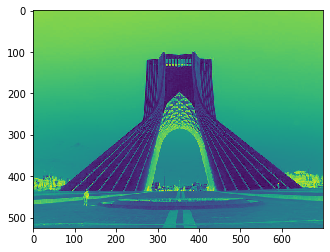

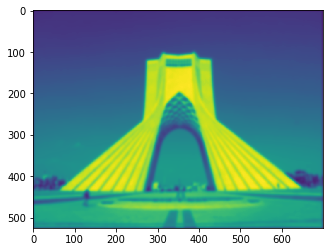

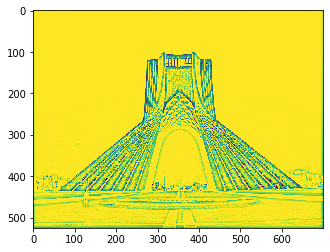

True

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# implement a function that returns a gaussian kernel
def make_gaussian(size=3, std=1):
    # Your code here
    k_1d = np.exp(-(np.linspace(-(size//2), size//2, size) ** 2) / (2 * std ** 2))
    kernel = k_1d.reshape(size, 1) * k_1d
    kernel /= np.sum(kernel)
    return kernel
    

# implement a 2D convolution
def convolve2d(image, kernel):
    # You do not need to modify these, but feel free to implement your own
    kernel       = np.flipud(np.fliplr(kernel))  # Flip the kernel, if it's symmetric it does not matter
    kernel_width = kernel.shape[0]
    kernel_height= kernel.shape[1]
    padding      = (kernel_width - 1)
    offset       = padding // 2
    output       = np.zeros_like(image)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + padding, image.shape[1] + padding))   
    image_padded[offset:-offset, offset:-offset] = image

    # implement the convolution inside the inner for loop
    for y in range(image.shape[0]):
        
        for x in range(image.shape[1]):
            
            # Convolution - Your code here
            output[y,x]= np.sum(kernel * image_padded[y:y + (offset * 2) + 1, x:x + (offset * 2) + 1])
            
    return output


path='C:/Users/jobe/Desktop/22/Azadi.jpg'
img_Azadi = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

img_not_Azadi= cv2.bitwise_not(img_Azadi)
plt.imshow(img_not_Azadi) 
plt.show()

kernell = make_gaussian(size=19, std=3)
blurred = convolve2d(img_Azadi, kernell)
plt.imshow(blurred) 
plt.show()

img_not_blurred= cv2.bitwise_not(blurred)

target_image= cv2.divide(img_not_Azadi ,img_not_blurred  ,scale=256)
plt.imshow(target_image) 
plt.show()
cv2.imwrite('Pencil_Sketch_Azadi.jpg',target_image) 